# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create Dataset randomly
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
#quadratic equation used is y=0.5x^2 + 1.5x + 2 + outliers

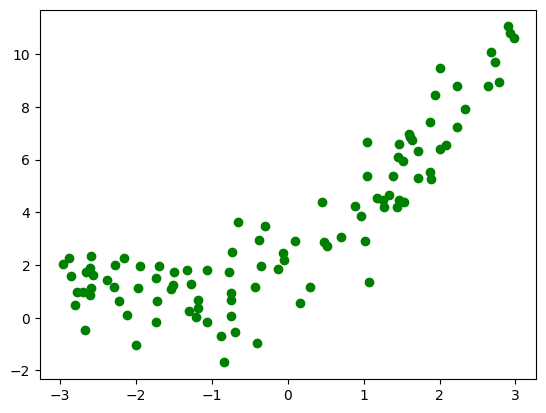

In [3]:
plt.scatter(X,y,color='green')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [6]:
regression.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = regression.predict(X_test)
y_pred

array([[7.06311018],
       [6.48354448],
       [5.0779018 ],
       [4.10156429],
       [4.33073891],
       [0.84820713],
       [7.71616035],
       [1.82776281],
       [1.15011147],
       [1.43374704],
       [0.55069534],
       [6.92151885],
       [5.8936076 ],
       [5.8771995 ],
       [2.54805979],
       [1.96372352],
       [5.23594166],
       [3.90287109],
       [1.78727805],
       [6.1567269 ],
       [3.15344442],
       [1.47668718],
       [2.58769924],
       [6.17441178],
       [1.74353185]])

In [8]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.660349890274054


Text(0, 0.5, 'Y')

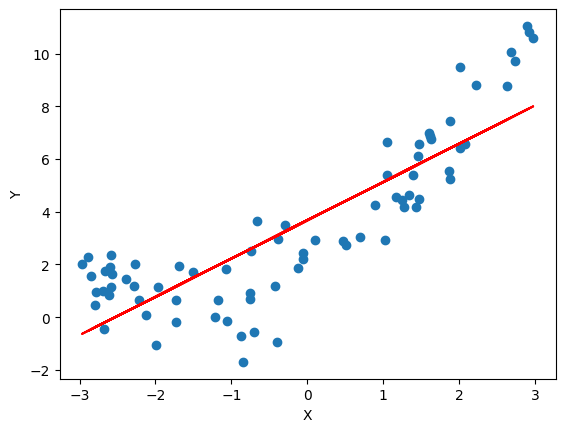

In [9]:
##Lets visualize model
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X")
plt.ylabel("Y")

In [10]:
#Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
X_train_poly

array([[ 1.00000000e+00, -2.28329630e+00,  5.21344200e+00],
       [ 1.00000000e+00, -1.20982531e+00,  1.46367729e+00],
       [ 1.00000000e+00,  2.01017006e+00,  4.04078368e+00],
       [ 1.00000000e+00, -2.59994722e+00,  6.75972556e+00],
       [ 1.00000000e+00, -2.66135031e+00,  7.08278549e+00],
       [ 1.00000000e+00,  1.87325863e+00,  3.50909789e+00],
       [ 1.00000000e+00, -8.72618014e-01,  7.61462199e-01],
       [ 1.00000000e+00,  2.92590281e+00,  8.56090726e+00],
       [ 1.00000000e+00, -7.35796115e-01,  5.41395923e-01],
       [ 1.00000000e+00, -1.99605144e+00,  3.98422133e+00],
       [ 1.00000000e+00,  1.88037771e+00,  3.53582031e+00],
       [ 1.00000000e+00, -2.88573907e+00,  8.32748998e+00],
       [ 1.00000000e+00, -1.06808809e+00,  1.14081217e+00],
       [ 1.00000000e+00,  2.97535590e+00,  8.85274271e+00],
       [ 1.00000000e+00, -2.80042131e+00,  7.84235953e+00],
       [ 1.00000000e+00, -2.38234790e+00,  5.67558153e+00],
       [ 1.00000000e+00, -7.52607378e-01

In [12]:
X_test_poly

array([[ 1.        ,  2.33413916,  5.44820562],
       [ 1.        ,  1.93502588,  3.74432516],
       [ 1.        ,  0.96704129,  0.93516886],
       [ 1.        ,  0.29469428,  0.08684472],
       [ 1.        ,  0.45251355,  0.20476851],
       [ 1.        , -1.9457041 ,  3.78576443],
       [ 1.        ,  2.78385693,  7.74985943],
       [ 1.        , -1.27114091,  1.61579922],
       [ 1.        , -1.73780008,  3.01994913],
       [ 1.        , -1.54247672,  2.37923444],
       [ 1.        , -2.15058321,  4.62500814],
       [ 1.        ,  2.23663342,  5.00252906],
       [ 1.        ,  1.52877056,  2.33713944],
       [ 1.        ,  1.51747126,  2.30271903],
       [ 1.        , -0.77511416,  0.60080196],
       [ 1.        , -1.17751266,  1.38653607],
       [ 1.        ,  1.07587418,  1.15750526],
       [ 1.        ,  0.1578658 ,  0.02492161],
       [ 1.        , -1.29902042,  1.68745405],
       [ 1.        ,  1.70996557,  2.92398223],
       [ 1.        , -0.35822088,  0.128

In [13]:
from sklearn.metrics import r2_score
regression.fit(X_train_poly, y_train)
y_pred_poly = regression.predict(X_test_poly)
score_poly = r2_score(y_test, y_pred_poly)
print(score_poly)

0.8301041629480146


In [14]:
print(regression.coef_)

[[0.         1.6063546  0.48152991]]


In [15]:
print(regression.intercept_)

[2.06635213]


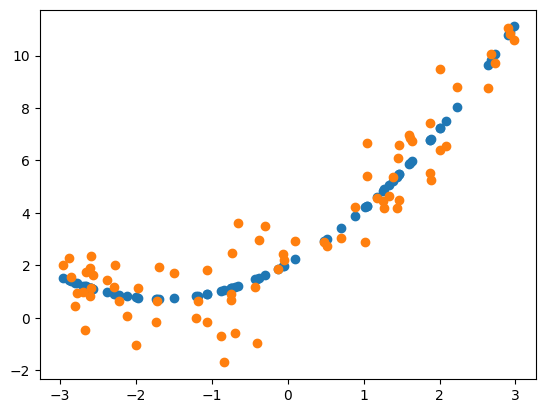

In [18]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [19]:
#Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

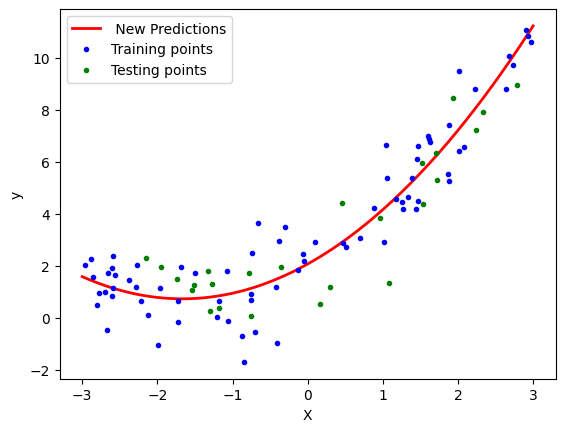

In [22]:
y_new = regression.predict(X_new_poly)
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

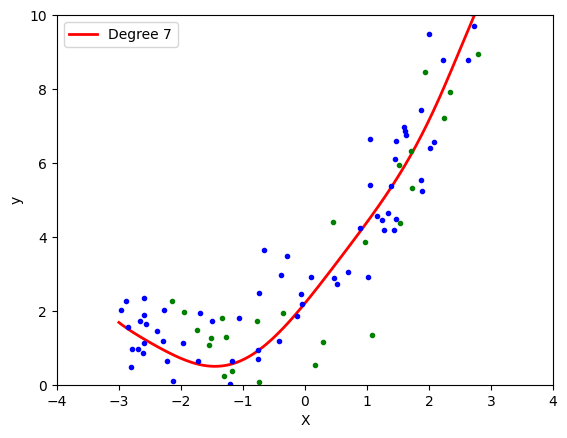

In [30]:
poly_regression(7)